In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Análisis exploratorio de los datos de aportes diarios**

In [2]:
# descarga de los aportes diarios desde el 2000 hasta 2019
temp_aportes_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000, 2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario = pd.concat([temp_aportes_diario, new_data])
    temp_aportes_diario = temp_aportes_diario.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario['Aportes Energía gWh'] = temp_aportes_diario['Aportes Energía kWh']/1000000
temp_aportes_diario['Aportes %'] = temp_aportes_diario['Aportes %']*100

In [3]:
# descarga de los aportes diarios desde el 2020 hasta 2021
temp_aportes_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020, 2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario_2 = pd.concat([temp_aportes_diario_2, new_data])
    temp_aportes_diario_2 = temp_aportes_diario_2.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario_2['Aportes Energía gWh'] = temp_aportes_diario_2['Aportes Energía kWh']/1000000
temp_aportes_diario_2['Aportes %'] = temp_aportes_diario_2['Aportes %']*100

In [4]:
df_ap = pd.concat([temp_aportes_diario,temp_aportes_diario_2])

In [5]:
df_ap.tail(2)

,Fecha,Region Hidrologica,Nombre Río,Aportes Caudal m3/s,Aportes Energía kWh,Aportes %,Aportes Energía gWh
6628,2021-07-14,VALLE,DIGUA,20.32,294500.0,98.166667,0.2945
6629,2021-07-14,VALLE,FLORIDA II,20.05,401000.0,66.833333,0.4010


In [6]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204824 entries, 0 to 6629
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fecha                204824 non-null  object 
 1   Region Hidrologica   204824 non-null  object 
 2   Nombre Río           204824 non-null  object 
 3   Aportes Caudal m3/s  196671 non-null  float64
 4   Aportes Energía kWh  202383 non-null  float64
 5   Aportes %            202326 non-null  float64
 6   Aportes Energía gWh  202383 non-null  float64
dtypes: float64(4), object(3)
memory usage: 12.5+ MB


In [7]:
df_ap['Fecha'] = pd.to_datetime(df_ap['Fecha'])

In [8]:
# 

# creando las columnas dias, meses y años
df_ap['Year'] = df_ap['Fecha'].dt.year
df_ap['Month'] = df_ap['Fecha'].dt.month_name()
df_ap['Weekday Name'] = df_ap['Fecha'].dt.day_name()

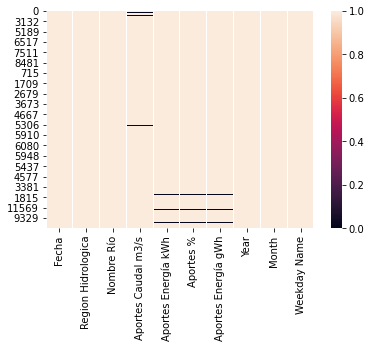

In [9]:
sns.heatmap(df_ap.notna())

In [10]:
df_ap.isnull().sum()

Fecha                     0
Region Hidrologica        0
Nombre Río                0
Aportes Caudal m3/s    8153
Aportes Energía kWh    2441
Aportes %              2498
Aportes Energía gWh    2441
Year                      0
Month                     0
Weekday Name              0
dtype: int64

In [11]:
df_ap

,Fecha,Region Hidrologica,Nombre Río,Aportes Caudal m3/s,Aportes Energía kWh,Aportes %,Aportes Energía gWh,Year,Month,Weekday Name
0,2000-01-01,ANTIOQUIA,A. SAN LORENZO,18.50,3924500.0,65.082919,3.9245,2000,January,Saturday
1,2000-01-01,ANTIOQUIA,CONCEPCION,5.37,1103300.0,110.330000,1.1033,2000,January,Saturday
2,2000-01-01,ANTIOQUIA,"DESV. EEPPM (NEC,PAJ,DOL)",9.98,2050500.0,130.605096,2.0505,2000,January,Saturday
3,2000-01-01,ANTIOQUIA,GRANDE,28.03,5192100.0,120.187500,5.1921,2000,January,Saturday
4,2000-01-01,ANTIOQUIA,GUADALUPE,15.82,3250400.0,112.861111,3.2504,2000,January,Saturday
...,...,...,...,...,...,...,...,...,...,...
6625,2021-07-14,VALLE,ALTOANCHICAYA,25.28,2535500.0,81.006390,2.5355,2021,July,Wednesday
6626,2021-07-14,VALLE,CALIMA,5.00,220800.0,61.333333,0.2208,2021,July,Wednesday
6627,2021-07-14,VALLE,CAUCA SALVAJINA,143.60,2982200.0,142.009524,2.9822,2021,July,Wednesday
6628,2021-07-14,VALLE,DIGUA,20.32,294500.0,98.166667,0.2945,2021,July,Wednesday


In [12]:
df_ap['Region Hidrologica'].value_counts()

ANTIOQUIA         94521
VALLE             38266
CENTRO            33422
ORIENTE           23598
RIOS ESTIMADOS     7866
CARIBE             7151
Name: Region Hidrologica, dtype: int64

In [17]:
df_Antioquia = df_ap[df_ap['Region Hidrologica'] == 'ANTIOQUIA']
df_Valle = df_ap[df_ap['Region Hidrologica'] == 'VALLE']
df_Centro = df_ap[df_ap['Region Hidrologica'] == 'CENTRO']
df_Oriente = df_ap[df_ap['Region Hidrologica'] == 'ORIENTE']
df_Rios = df_ap[df_ap['Region Hidrologica'] == 'RIOS ESTIMADOS']
df_Caribe = df_ap[df_ap['Region Hidrologica'] == 'CARIBE']

In [21]:
ts_Antioquia = df_Antioquia[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Antioquia.Fecha).agg(['sum','min','max', np.mean, np.median, np.std])
ts_Valle = df_Valle[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Valle.Fecha).agg(['sum','min','max', np.mean, np.median, np.std])
ts_Centro = df_Centro[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Centro.Fecha).agg(['sum','min','max', np.mean, np.median, np.std])
ts_Oriente = df_Oriente[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Oriente.Fecha).agg(['sum','min','max', np.mean, np.median, np.std])
ts_Rios = df_Rios[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Rios.Fecha).agg(['sum','min','max', np.mean, np.median, np.std])
ts_Caribe = df_Caribe[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Caribe.Fecha).agg(['sum','min','max', np.mean, np.median, np.std])

In [23]:
ts_Antioquia.columns

MultiIndex([('Aportes Caudal m3/s',    'sum'),
            ('Aportes Caudal m3/s',    'min'),
            ('Aportes Caudal m3/s',    'max'),
            ('Aportes Caudal m3/s',   'mean'),
            ('Aportes Caudal m3/s', 'median'),
            ('Aportes Caudal m3/s',    'std'),
            ('Aportes Energía kWh',    'sum'),
            ('Aportes Energía kWh',    'min'),
            ('Aportes Energía kWh',    'max'),
            ('Aportes Energía kWh',   'mean'),
            ('Aportes Energía kWh', 'median'),
            ('Aportes Energía kWh',    'std'),
            (          'Aportes %',    'sum'),
            (          'Aportes %',    'min'),
            (          'Aportes %',    'max'),
            (          'Aportes %',   'mean'),
            (          'Aportes %', 'median'),
            (          'Aportes %',    'std')],
           )

In [24]:
Ant = [('Aportes Caudal m3/s_Ant',    'sum_Ant'),
            ('Aportes Caudal m3/s_Ant',    'min_Ant'),
            ('Aportes Caudal m3/s_Ant',    'max_Ant'),
            ('Aportes Caudal m3/s_Ant',   'mean_Ant'),
            ('Aportes Caudal m3/s_Ant', 'median_Ant'),
            ('Aportes Caudal m3/s_Ant',    'std_Ant'),
            ('Aportes Energía kWh_Ant',    'sum_Ant'),
            ('Aportes Energía kWh_Ant',    'min_Ant'),
            ('Aportes Energía kWh_Ant',    'max_Ant'),
            ('Aportes Energía kWh_Ant',   'mean_Ant'),
            ('Aportes Energía kWh_Ant', 'median_Ant'),
            ('Aportes Energía kWh_Ant',    'std_Ant'),
            (          'Aportes %_Ant',    'sum_Ant'),
            (          'Aportes %_Ant',    'min_Ant'),
            (          'Aportes %_Ant',    'max_Ant'),
            (          'Aportes %_Ant',   'mean_Ant'),
            (          'Aportes %_Ant', 'median_Ant'),
            (          'Aportes %_Ant',    'std_Ant')]

In [ ]:
Val = [('Aportes Caudal m3/s_Val',    'sum_Val'),
            ('Aportes Caudal m3/s_Val',    'min_Val'),
            ('Aportes Caudal m3/s_Val',    'max_Val'),
            ('Aportes Caudal m3/s_Val',   'mean_Val'),
            ('Aportes Caudal m3/s_Val', 'median_Val'),
            ('Aportes Caudal m3/s_Val',    'std_Val'),
            ('Aportes Energía kWh_Val',    'sum_Val'),
            ('Aportes Energía kWh_Val',    'min_Val'),
            ('Aportes Energía kWh_Val',    'max_Val'),
            ('Aportes Energía kWh_Val',   'mean_Val'),
            ('Aportes Energía kWh_Val', 'median_Val'),
            ('Aportes Energía kWh_Val',    'std_Val'),
            (          'Aportes %_Val',    'sum_Val'),
            (          'Aportes %_Val',    'min_Val'),
            (          'Aportes %_Val',    'max_Val'),
            (          'Aportes %_Val',   'mean_Val'),
            (          'Aportes %_Val', 'median_Val'),
            (          'Aportes %_Val',    'std_Val')]

In [38]:
Cen = [('Aportes Caudal m3/s_Cen',    'sum_Cen'),
            ('Aportes Caudal m3/s_Cen',    'min_Cen'),
            ('Aportes Caudal m3/s_Cen',    'max_Cen'),
            ('Aportes Caudal m3/s_Cen',   'mean_Cen'),
            ('Aportes Caudal m3/s_Cen', 'median_Cen'),
            ('Aportes Caudal m3/s_Cen',    'std_Cen'),
            ('Aportes Energía kWh_Cen',    'sum_Cen'),
            ('Aportes Energía kWh_Cen',    'min_Cen'),
            ('Aportes Energía kWh_Cen',    'max_Cen'),
            ('Aportes Energía kWh_Cen',   'mean_Cen'),
            ('Aportes Energía kWh_Cen', 'median_Cen'),
            ('Aportes Energía kWh_Cen',    'std_Cen'),
            (          'Aportes %_Cen',    'sum_Cen'),
            (          'Aportes %_Cen',    'min_Cen'),
            (          'Aportes %_Cen',    'max_Cen'),
            (          'Aportes %_Cen',   'mean_Cen'),
            (          'Aportes %_Cen', 'median_Cen'),
            (          'Aportes %_Cen',    'std_Cen')]

In [43]:
Ori = [('Aportes Caudal m3/s_Ori',    'sum_Ori'),
            ('Aportes Caudal m3/s_Ori',    'min_Ori'),
            ('Aportes Caudal m3/s_Ori',    'max_Ori'),
            ('Aportes Caudal m3/s_Ori',   'mean_Ori'),
            ('Aportes Caudal m3/s_Ori', 'median_Ori'),
            ('Aportes Caudal m3/s_Ori',    'std_Ori'),
            ('Aportes Energía kWh_Ori',    'sum_Ori'),
            ('Aportes Energía kWh_Ori',    'min_Ori'),
            ('Aportes Energía kWh_Ori',    'max_Ori'),
            ('Aportes Energía kWh_Ori',   'mean_Ori'),
            ('Aportes Energía kWh_Ori', 'median_Ori'),
            ('Aportes Energía kWh_Ori',    'std_Ori'),
            (          'Aportes %_Ori',    'sum_Ori'),
            (          'Aportes %_Ori',    'min_Ori'),
            (          'Aportes %_Ori',    'max_Ori'),
            (          'Aportes %_Ori',   'mean_Ori'),
            (          'Aportes %_Ori', 'median_Ori'),
            (          'Aportes %_Ori',    'std_Ori')]

In [44]:
Rio = [('Aportes Caudal m3/s_Rio',    'sum_Rio'),
            ('Aportes Caudal m3/s_Rio',    'min_Rio'),
            ('Aportes Caudal m3/s_Rio',    'max_Rio'),
            ('Aportes Caudal m3/s_Rio',   'mean_Rio'),
            ('Aportes Caudal m3/s_Rio', 'median_Rio'),
            ('Aportes Caudal m3/s_Rio',    'std_Rio'),
            ('Aportes Energía kWh_Rio',    'sum_Rio'),
            ('Aportes Energía kWh_Rio',    'min_Rio'),
            ('Aportes Energía kWh_Rio',    'max_Rio'),
            ('Aportes Energía kWh_Rio',   'mean_Rio'),
            ('Aportes Energía kWh_Rio', 'median_Rio'),
            ('Aportes Energía kWh_Rio',    'std_Rio'),
            (          'Aportes %_Rio',    'sum_Rio'),
            (          'Aportes %_Rio',    'min_Rio'),
            (          'Aportes %_Rio',    'max_Rio'),
            (          'Aportes %_Rio',   'mean_Rio'),
            (          'Aportes %_Rio', 'median_Rio'),
            (          'Aportes %_Rio',    'std_Rio')]

In [46]:
Car = [('Aportes Caudal m3/s_Car',    'sum_Car'),
            ('Aportes Caudal m3/s_Car',    'min_Car'),
            ('Aportes Caudal m3/s_Car',    'max_Car'),
            ('Aportes Caudal m3/s_Car',   'mean_Car'),
            ('Aportes Caudal m3/s_Car', 'median_Car'),
            ('Aportes Caudal m3/s_Car',    'std_Car'),
            ('Aportes Energía kWh_Car',    'sum_Car'),
            ('Aportes Energía kWh_Car',    'min_Car'),
            ('Aportes Energía kWh_Car',    'max_Car'),
            ('Aportes Energía kWh_Car',   'mean_Car'),
            ('Aportes Energía kWh_Car', 'median_Car'),
            ('Aportes Energía kWh_Car',    'std_Car'),
            (          'Aportes %_Car',    'sum_Car'),
            (          'Aportes %_Car',    'min_Car'),
            (          'Aportes %_Car',    'max_Car'),
            (          'Aportes %_Car',   'mean_Car'),
            (          'Aportes %_Car', 'median_Car'),
            (          'Aportes %_Car',    'std_Car')]

In [47]:
ts_Antioquia.columns = Ant
ts_Valle.columns = Val
ts_Centro.columns = Cen
ts_Oriente.colums = Ori
ts_Rios.columns = Rio
ts_Caribe.columns = Car

In [50]:
merge1 = ts_Antioquia.merge(ts_Valle, how = 'left', on = 'Fecha')
merge2 = merge1.merge(ts_Centro, how = 'left', on = 'Fecha' )
merge3 = merge2.merge(ts_Oriente, how = 'left', on = 'Fecha' )
merge4 = merge3.merge(ts_Rios, how = 'left', on = 'Fecha' )
ts_hydrology = merge4.merge(ts_Caribe, how = 'left', on = 'Fecha' )
ts_hydrology

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,"(Aportes Caudal m3/s_Ant, sum_Ant)","(Aportes Caudal m3/s_Ant, min_Ant)","(Aportes Caudal m3/s_Ant, max_Ant)","(Aportes Caudal m3/s_Ant, mean_Ant)","(Aportes Caudal m3/s_Ant, median_Ant)","(Aportes Caudal m3/s_Ant, std_Ant)","(Aportes Energía kWh_Ant, sum_Ant)","(Aportes Energía kWh_Ant, min_Ant)","(Aportes Energía kWh_Ant, max_Ant)","(Aportes Energía kWh_Ant, mean_Ant)","(Aportes Energía kWh_Ant, median_Ant)","(Aportes Energía kWh_Ant, std_Ant)","(Aportes %_Ant, sum_Ant)","(Aportes %_Ant, min_Ant)","(Aportes %_Ant, max_Ant)","(Aportes %_Ant, mean_Ant)","(Aportes %_Ant, median_Ant)","(Aportes %_Ant, std_Ant)","(Aportes Caudal m3/s_Val, sum_Val)","(Aportes Caudal m3/s_Val, min_Val)","(Aportes Caudal m3/s_Val, max_Val)","(Aportes Caudal m3/s_Val, mean_Val)","(Aportes Caudal m3/s_Val, median_Val)","(Aportes Caudal m3/s_Val, std_Val)","(Aportes Energía kWh_Val, sum_Val)","(Aportes Energía kWh_Val, min_Val)","(Aportes Energía kWh_Val, max_Val)","(Aportes Energía kWh_Val, mean_Val)","(Aportes Energía kWh_Val, median_Val)","(Aportes Energía kWh_Val, std_Val)","(Aportes %_Val, sum_Val)","(Aportes %_Val, min_Val)","(Aportes %_Val, max_Val)","(Aportes %_Val, mean_Val)","(Aportes %_Val, median_Val)","(Aportes %_Val, std_Val)","(Aportes Caudal m3/s_Cen, sum_Cen)","(Aportes Caudal m3/s_Cen, min_Cen)","(Aportes Caudal m3/s_Cen, max_Cen)","(Aportes Caudal m3/s_Cen, mean_Cen)",...,"(Aportes %, max)","(Aportes %, mean)","(Aportes %, median)","(Aportes %, std)","(Aportes Caudal m3/s_Rio, sum_Rio)","(Aportes Caudal m3/s_Rio, min_Rio)","(Aportes Caudal m3/s_Rio, max_Rio)","(Aportes Caudal m3/s_Rio, mean_Rio)","(Aportes Caudal m3/s_Rio, median_Rio)","(Aportes Caudal m3/s_Rio, std_Rio)","(Aportes Energía kWh_Rio, sum_Rio)","(Aportes Energía kWh_Rio, min_Rio)","(Aportes Energía kWh_Rio, max_Rio)","(Aportes Energía kWh_Rio, mean_Rio)","(Aportes Energía kWh_Rio, median_Rio)","(Aportes Energía kWh_Rio, std_Rio)","(Aportes %_Rio, sum_Rio)","(Aportes %_Rio, min_Rio)","(Aportes %_Rio, max_Rio)","(Aportes %_Rio, mean_Rio)","(Aportes %_Rio, median_Rio)","(Aportes %_Rio, std_Rio)","(Aportes Caudal m3/s_Car, sum_Car)","(Aportes Caudal m3/s_Car, min_Car)","(Aportes Caudal m3/s_Car, max_Car)","(Aportes Caudal m3/s_Car, mean_Car)","(Aportes Caudal m3/s_Car, median_Car)","(Aportes Caudal m3/s_Car, std_Car)","(Aportes Energía kWh_Car, sum_Car)","(Aportes Energía kWh_Car, min_Car)","(Aportes Energía kWh_Car, max_Car)","(Aportes Energía kWh_Car, mean_Car)","(Aportes Energía kWh_Car, median_Car)","(Aportes Energía kWh_Car, std_Car)","(Aportes %_Car, sum_Car)","(Aportes %_Car, min_Car)","(Aportes %_Car, max_Car)","(Aportes %_Car, mean_Car)","(Aportes %_Car, median_Car)","(Aportes %_Car, std_Car)"
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,161.950,2.340,43.510,17.994444,15.82000,12.884114,35761700.0,480800.0,14130700.0,3.973522e+06,3250400.0,4.117812e+06,930.043426,65.082919,130.605096,103.338158,112.861111,24.796847,269.15,20.04,249.11,134.575,134.575,161.976950,6374400.0,856100.0,5518300.0,3187200.0,3187200.0,3.296673e+06,334.168220,152.019284,182.148936,167.084110,167.084110,21.304882,263.180,7.73,221.630,87.726667,...,74.245763,66.683622,67.558190,8.035200,0.0,NaN,NaN,NaN,NaN,NaN,2863800.0,2863800.0,2863800.0,2863800.0,2863800.0,NaN,99.437500,99.437500,99.437500,99.437500,99.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,162.850,2.340,43.670,18.094444,14.29000,13.184052,36098500.0,480800.0,14182600.0,4.010944e+06,2936100.0,4.162548e+06,928.288584,57.470320,132.834395,103.143176,112.390000,25.617413,312.32,28.07,284.25,156.160,156.160,181.146615,7495900.0,1199200.0,6296700.0,3747950.0,3747950.0,3.604477e+06,428.611746,173.462810,255.148936,214.305873,214.305873,57.760814,273.630,1.15,221.870,91.210000,...,68.122845,53.845373,53.845373,20.191394,0.0,NaN,NaN,NaN,NaN,NaN,2889200.0,2889200.0,2889200.0,2889200.0,2889200.0,NaN,100.319444,100.319444,100.319444,100.319444

In [51]:
ts_Caribe

,"(Aportes Caudal m3/s_Car, sum_Car)","(Aportes Caudal m3/s_Car, min_Car)","(Aportes Caudal m3/s_Car, max_Car)","(Aportes Caudal m3/s_Car, mean_Car)","(Aportes Caudal m3/s_Car, median_Car)","(Aportes Caudal m3/s_Car, std_Car)","(Aportes Energía kWh_Car, sum_Car)","(Aportes Energía kWh_Car, min_Car)","(Aportes Energía kWh_Car, max_Car)","(Aportes Energía kWh_Car, mean_Car)","(Aportes Energía kWh_Car, median_Car)","(Aportes Energía kWh_Car, std_Car)","(Aportes %_Car, sum_Car)","(Aportes %_Car, min_Car)","(Aportes %_Car, max_Car)","(Aportes %_Car, mean_Car)","(Aportes %_Car, median_Car)","(Aportes %_Car, std_Car)"
Fecha,,,,,,,,,,,,,,,,,,
2001-12-16,649.62,649.62,649.62,649.62,649.62,NaN,6791400.0,6791400.0,6791400.0,6791400.0,6791400.0,NaN,227.137124,227.137124,227.137124,227.137124,227.137124,NaN
2001-12-17,554.35,554.35,554.35,554.35,554.35,NaN,5795400.0,5795400.0,5795400.0,5795400.0,5795400.0,NaN,193.826087,193.826087,193.826087,193.826087,193.826087,NaN
2001-12-18,422.02,422.02,422.02,422.02,422.02,NaN,4412000.0,4412000.0,4412000.0,4412000.0,4412000.0,NaN,147.558528,147.558528,147.558528,147.558528,147.558528,NaN
2001-12-19,342.98,342.98,342.98,342.98,342.98,NaN,3585700.0,3585700.0,3585700.0,3585700.0,3585700.0,NaN,119.923077,119.923077,119.923077,119.923077,119.923077,NaN
2001-12-20,505.19,505.19,505.19,505.19,505.19,NaN,5281500.0,5281500.0,5281500.0,5281500.0,5281500.0,NaN,176.638796,176.638796,176.638796,176.638796,176.638796,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10,507.76,507.76,507.76,507.76,507.76,NaN,5615400.0,5615400.0,5615400.0,5615400.0,5615400.0,NaN,103.988889,103.988889,103.988889,103.988889,103.988889,NaN
2021-07-11,539.56,539.56,539.56,539.56,539.56,NaN,5967100.0,5967100.0,5967100.0,5967100.0,5967100.0,NaN,110.501852,110.501852,110.501852,110.501852,110.501852,NaN
2021-07-12,489.60,489.60,489.60,489.60,489.60,NaN,5414600.0,5414600.0,5414600.0,5414600.0,5414600.0,NaN,100.270370,100.270370,100.270370,100.270370,100.270370,NaN
